In [1]:
import pandas as pd

# with processed lyrics dataset
# df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data.csv")

# with unprocessed lyrics dataset
df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data_without_lyrics.csv", encoding='utf-8')

In [2]:
# verify df
df

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,234 ContributorsTranslationsTürkçeSvenskaEspañ...,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,351 ContributorsTranslationsTürkçeEspañolPortu...,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,223 ContributorsTranslationsSvenskaEspañolPort...,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,2 ContributorsPost Malone Essentials Lyrics1. ...,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,519 ContributorsTranslationsTürkçeEspañolРусск...,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,193636,75,1,"25 Contributors512 Lyrics[Letra de ""512""]\n\n[...",0.818,0.673,4.0,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,214013,72,1,17 ContributorsTranslationsEnglishDiosa Lyrics...,0.801,0.745,6.0,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,137760,70,0,50 ContributorsA-Punk Lyrics[Verse 1]\nJohanna...,0.551,0.819,2.0,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0
2453,TQM,Fuerza Regida,TQM,2023-05-19,158965,78,1,"14 ContributorsTQM Lyrics[Letra de ""TQM""]\n\n[...",0.786,0.853,5.0,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0


In [3]:
# Remove song with missing lyrics first

print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))
# 3 lyrics --> drop all null (not english songs)

df.dropna(subset=['lyrics'], inplace=True)

# check null songs
print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))

Number of null values in the dataset:
track_name          0
artist              0
album               0
release_date        0
duration            0
popularity          0
explicit            0
lyrics              3
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64
Number of null values in the dataset:
track_name          0
artist              0
album               0
release_date        0
duration            0
popularity          0
explicit            0
lyrics              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64


In [4]:
# text preprocessing steps

# make a copy of the existing df to handle eda 
df_eda=df.copy()

In [5]:
# try to remove songs with numbered list contents
import pandas as pd
import re

# check if any line in the text starts with a numbered list, if yes remove it
def modify_if_numbered_list(text):
    # split the text per line
    lines = text.split('\n')
    pattern = r'^\d+\.'  # ^ asserts the position at the start of the string, \d+ matches one or more digits, \. matches a dot
    
    # Check each line to see with condiiton
    for line in lines:
        # Strip whitespace from the line
        if re.match(pattern, line.strip()):  
            return ''  
    return text  

# Apply function to the 'lyrics' column
df_eda['lyrics'] = df_eda['lyrics'].apply(modify_if_numbered_list)

print(df_eda[df_eda['lyrics']=='']) # 96 songs to be fixed later

                                             track_name          artist  \
3         Sunflower - Spider-Man: Into the Spider-Verse     Post Malone   
63                            Havana (feat. Young Thug)  Camila Cabello   
64                            Levitating (feat. DaBaby)        Dua Lipa   
109                              Mood (feat. iann dior)        24kGoldn   
120                            Kiss Me More (feat. SZA)        Doja Cat   
...                                                 ...             ...   
2325                       Mamichula - con Nicki Nicole          Trueno   
2328                                          Mr. Rager        Kid Cudi   
2362  I Don't Like It, I Love It (feat. Robin Thicke...        Flo Rida   
2363                                Hide (feat. Seezyn)      Juice WRLD   
2431          Entre Nosotros (Remix) [con Nicki Nicole]       Tiago PZK   

                                                  album release_date  \
3                          

In [6]:
# NOTE: make songs with over 1200 words empty

df_eda['lyrics_word_count']=df['lyrics'].apply(lambda x: len(x.split()))

# Update the lyrics to an empty string if the word count exceeds 1200
df_eda.loc[df_eda['lyrics_word_count'] > 1200, 'lyrics'] = ''

# # Drop the 'lyrics_word_count' column 
df_eda.drop(columns=['lyrics_word_count'], inplace=True)


In [7]:
df_eda[df_eda['lyrics'] == ''].index

Int64Index([   3,   63,   64,   83,  109,  120,  137,  156,  158,  176,
            ...
            2328, 2362, 2363, 2370, 2377, 2395, 2406, 2415, 2421, 2431],
           dtype='int64', length=196)

In [8]:
import lyricsgenius
import re
import pandas as pd

# fetch the lyrics back
genius = lyricsgenius.Genius("jCaG2w1CCDLgiXm8JGamJxOdA1Z8eMEKYJhjecctVLM270hsAJkwDBReNzhbZ4Fg", retries=3)

def fetch_missing_lyrics(df):
    # Find the songs' index with empty lyrics
    missing_lyrics_index = df[df['lyrics'] == ''].index
    
    # Iterate through the indexes with missing lyrics
    for i in missing_lyrics_index:
        try:
            track_name = df.loc[i, 'track_name']
            artist_name = df.loc[i, 'artist']
            song = genius.search_song(track_name, artist_name)

            if song and len(song.lyrics.split('\n')) > 1 and re.match(r'^\d+\.', song.lyrics.split('\n')[1].strip()):
                track_name = df.loc[i, 'track_name'].split("(", 1)[0] # Remove anything after '-' in the track name
                song = genius.search_song(track_name, artist_name)

            
            if song and len(song.lyrics.split('\n')) > 1 and re.match(r'^\d+\.', song.lyrics.split('\n')[1].strip()):
                track_name = df.loc[i, 'track_name'].split("-", 1)[0]  # Remove anything after '-' in the track name
                song = genius.search_song(track_name, artist_name)
            
            # Assign the lyrics to the DataFrame regardless of the condition
            if song:
                df.loc[i, 'lyrics'] = song.lyrics
            else:
                print(f"Lyrics not found for track: {track_name} by {artist_name}")

        except Exception as e:
            print(f"Error occurred for index {i}: {e}")

    return df

# Fetch missing lyrics
df_eda = fetch_missing_lyrics(df_eda)

Searching for "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone...
Done.
Searching for "Sunflower - Spider-Man: Into the Spider-Verse" by Post Malone...
Done.
Searching for "Sunflower " by Post Malone...
Done.
Searching for "Havana (feat. Young Thug)" by Camila Cabello...
Done.
Searching for "Levitating (feat. DaBaby)" by Dua Lipa...
Done.
Searching for "Levitating " by Dua Lipa...
Done.
Searching for "Wonderwall - Remastered" by Oasis...
Done.
Searching for "Mood (feat. iann dior)" by 24kGoldn...
Done.
Searching for "Mood " by 24kGoldn...
Done.
Searching for "Kiss Me More (feat. SZA)" by Doja Cat...
Done.
Searching for "Kiss Me More " by Doja Cat...
Done.
Searching for "Can't Feel My Face (In the Style of the Weeknd) [Karaoke Version]" by The Karaoke Studio...
Done.
Searching for "Girls Like You (feat. Cardi B) - Cardi B Version" by Maroon 5...
Done.
Searching for "ROCKSTAR (feat. Roddy Ricch)" by DaBaby...
Done.
Searching for "ROCKSTAR " by DaBaby...
Done.
Searching for 

In [9]:
# check songs that still miss lyrics
df_eda[df_eda['lyrics'] == ''][['track_name', 'artist']]

# result: Let It Go Idina Menzel

,track_name,artist
614,It's Beginning to Look a Lot like Christmas - ...,Michael Bublé
841,Can't Help Falling In Love - with The Royal Ph...,Elvis Presley
1090,"Let It Go - From ""Frozen""/Soundtrack Version",Idina Menzel
2421,"Comptine d'un autre été, l'après-midi",Yann Tiersen


In [10]:
# manually impute song Let It Go

missing_lyrics_index = df_eda[df_eda['lyrics'] == ''].index

for i in missing_lyrics_index:

    track_name = df_eda.loc[i, 'track_name'].split("-", 1)[0]  # Remove anything after '(' in the track name
    artist_name = df_eda.loc[i, 'artist']

    song = genius.search_song(track_name, artist_name)

    df_eda.loc[i, 'lyrics'] = song.lyrics

Searching for "It's Beginning to Look a Lot like Christmas " by Michael Bublé...
Done.
Searching for "Can't Help Falling In Love " by Elvis Presley...
Done.
Searching for "Let It Go " by Idina Menzel...
Done.
Searching for "Comptine d'un autre été, l'après" by Yann Tiersen...
Done.


In [11]:
# dentify the songs that are not in English. If not drop it
import numpy as np

from langdetect import detect, LangDetectException

# Function to check if text is in English, replace with NAN if not
def keep_english_text(text):
    try:
        # Check if the detected language is English
        if detect(text) == 'en':
            return text
        else:
            return np.nan
    except LangDetectException:
        # Return empty string if language detection fails
        return np.nan

# Apply the keep_english_text function to the 'text' column
df_eda['lyrics'] = df_eda['lyrics'].apply(keep_english_text)

# Display the resulting DataFrame
print(df_eda) 

                                         track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2450                                            512             Mora   
2451                                          Diosa      Myke Towers   
2452                                         A-Punk  Vampire Weekend   
2453                                            TQM    Fuerza Regida   
2454                                 NI BIEN NI MAL        Bad Bunny   

                                        album release_date  duration  \
0                                 After Hours   2020-03-20    2

In [12]:
# dropping missing lyrics (322)
print("Number of null values in the dataset:\n{0}".format(df_eda.isnull().sum())) #328 missing lyrics
df_eda.dropna(subset=['lyrics'], inplace=True)
print("Number of null values in the dataset:\n{0}".format(df_eda.isnull().sum()))

Number of null values in the dataset:
track_name            0
artist                0
album                 0
release_date          0
duration              0
popularity            0
explicit              0
lyrics              322
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64
Number of null values in the dataset:
track_name          0
artist              0
album               0
release_date        0
duration            0
popularity          0
explicit            0
lyrics              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signatur

In [13]:
# verify processed df: 2130 rows × 20 columns
df_eda

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,234 ContributorsTranslationsTürkçeSvenskaEspañ...,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,351 ContributorsTranslationsTürkçeEspañolPortu...,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,223 ContributorsTranslationsSvenskaEspañolPort...,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,285 ContributorsTranslationsTürkçeEspañolРусск...,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,519 ContributorsTranslationsTürkçeEspañolРусск...,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,1 ContributorWhen Love Takes Over Lyrics(David...,0.675,0.862,11.0,-4.614,1.0,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0
2446,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,26 ContributorsTranslationsРусскийEspañolHappi...,0.502,0.168,1.0,-14.061,1.0,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0
2447,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,2 ContributorsNew Music Friday 08/07/20 Lyrics...,0.694,0.685,6.0,-6.535,0.0,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0
2448,Saved,Khalid,American Teen,2017-04-27,206533,64,0,"76 ContributorsSaved Lyrics[Intro]\n2, 3, 4\n\...",0.739,0.448,10.0,-10.280,0.0,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0


In [14]:
df_eda[df_eda['lyrics']=='']

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [15]:
# genius.search_song('Ric Flair Drip', 'Offset').lyrics

# Locate the specific song in the DataFrame
track_name = 'Ric Flair Drip (with Metro Boomin)'
artist_name = 'Offset'

# Fetch the new lyrics using the Genius API
new_lyrics = genius.search_song('Ric Flair Drip', artist_name).lyrics

# Update the lyrics column for the specific row
df_eda.loc[df_eda['track_name'] == track_name, 'lyrics'] = new_lyrics

Searching for "Ric Flair Drip" by Offset...
Done.


In [16]:
df_eda[df_eda['artist'] == 'Offset']['lyrics'].iloc[0]

'225 ContributorsTranslationsPortuguêsРусскийTürkçeRic Flair Drip Lyrics[Intro]\n(Bijan 4 The 1 Time)\nMetro Boomin want some more, nigga! (Hey)\n\n[Chorus]\nGoing to the jeweler, bust the AP, yeah (Bust it)\nSlide on the water like a jet-ski, yeah (Woo, slide)\nI\'m tryna fuck you and your bestie, yeah (Hey)\nChopper with the scope so do not test me, (Drrt) yeah (Drrt)\nRic Flair drip, go "woo" on a bitch (Woo)\n57 90, split the coupe on my wrist (Ice)\nMulti-million dollar, I\'m a fool with the hits (Ayy)\nHop up in the Lamb\' and drop the roof, show the tits (Skrrt)\n\n[Verse 1]\nPoppin\' but you really not gon\' shoot (Pop)\n90 pointers down my diamonds look like hula hoops (90)\nHopping in my Bentayga and her seat is a masseuse (Hey)\nBalenciaga, check my posture, Valentino boots (Oho-ooh)\nIt\'s the Boominati way, a lotta Lambs, a lotta Wraiths (Boominati)\nNever hesitate to give a nigga yellow tape (Grrt)\nAin\'t worried \'bout the bag \'cause the cash accumulatin\' (Bags)\nSoon

In [17]:
# Basic Text Cleaning

# Notes:
# - replace (\u2005 with '')
# - first line not needed at all
# - remove the content wrapped in [], along with []
# - removed 3 digit number+embed string at the end, so for example take out "123embed" in the last line
# - remove lines with ''
# - remove the round brackets but keep the content

import re

def process_text(text):
    # Split the text by newline characters
    lines = text.split('\n')

    # Remove the first line
    lines = lines[1:]

    processed_lines = []
    for line in lines:
        # Replace (\u2005 with '')
        line = line.replace('\u2005', ' ')

        line = line.replace('"', '')

        # Remove the content wrapped in [], along with []
        line = re.sub(r'\[.*?\]', '', line)

        # Remove the 3 digit number + 'embed' string at the end
        line = re.sub(r'\d{3}Embed$', '', line)
        
        # Remove lines with ''
        if line.strip() == '':
            continue

        # Remove the round brackets but keep the content
        line = re.sub(r'[()]', '', line)

        # Append the cleaned line to the list
        processed_lines.append(line)

    # Join the cleaned lines back into a single string
    processed_text = '\n'.join(processed_lines)

    return processed_text

# apply changes
df_eda['lyrics'] = df_eda['lyrics'].apply(process_text)

In [18]:
# checking missing data
df_eda[df_eda['lyrics'] == '']

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [19]:
# make a new feature (mood) based on valence (which will be dropped later)
df_eda['mood']= df_eda['valence'].apply(lambda x: 0 if x < 0.5 else 1)
df_eda

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,Yeah\nI've been tryna call\nI've been on my ow...,0.514,0.730,...,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,A club isn't the best place to find a lover\nS...,0.825,0.652,...,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,"I'm going under, and this time, I fear there's...",0.501,0.405,...,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,"Ayy, ayy, ayy, ayy Ooh\nOoh, ooh, ooh, ooh Ooh...",0.755,0.522,...,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,"Ayy\nI'm tryna put you in the worst mood, ah\n...",0.679,0.587,...,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,It's complicated... it always is\nThat's just ...,0.675,0.862,...,-4.614,1.0,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0,0
2446,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,I'm really on the ropes this time\nI've been f...,0.502,0.168,...,-14.061,1.0,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0,0
2447,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,Juice WRLD - Smile with The Weeknd\nJoji & Dip...,0.694,0.685,...,-6.535,0.0,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0,0
2448,Saved,Khalid,American Teen,2017-04-27,206533,64,0,"2, 3, 4\nThe hard part always seems to last fo...",0.739,0.448,...,-10.280,0.0,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0,1


In [20]:

# Create separate copy of df purely for testing 


# determine word count
df_eda['lyrics_word_count']=df_eda['lyrics'].apply(lambda x: len(x.split()))

# determine unique words
df_eda['lyrics_unique_word_count']=df_eda['lyrics'].apply(set).apply(len)

# testing
df_eda

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood,lyrics_word_count,lyrics_unique_word_count
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,Yeah\nI've been tryna call\nI've been on my ow...,0.514,0.730,...,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0,263,38
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,A club isn't the best place to find a lover\nS...,0.825,0.652,...,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1,711,49
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,"I'm going under, and this time, I fear there's...",0.501,0.405,...,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0,327,36
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,"Ayy, ayy, ayy, ayy Ooh\nOoh, ooh, ooh, ooh Ooh...",0.755,0.522,...,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1,309,44
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,"Ayy\nI'm tryna put you in the worst mood, ah\n...",0.679,0.587,...,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0,488,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,It's complicated... it always is\nThat's just ...,0.675,0.862,...,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0,0,240,44
2446,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,I'm really on the ropes this time\nI've been f...,0.502,0.168,...,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0,0,245,41
2447,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,Juice WRLD - Smile with The Weeknd\nJoji & Dip...,0.694,0.685,...,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0,0,563,77
2448,Saved,Khalid,American Teen,2017-04-27,206533,64,0,"2, 3, 4\nThe hard part always seems to last fo...",0.739,0.448,...,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0,1,381,43


In [21]:
# numerical summary
df_eda[['lyrics_word_count', 'lyrics_unique_word_count']].describe()

,lyrics_word_count,lyrics_unique_word_count
count,2130.000000,2130.000000
mean,915.107512,51.882160
std,4833.607364,23.557286
min,16.000000,22.000000
25%,291.000000,43.000000
50%,384.000000,47.000000
75%,523.000000,54.000000
max,109097.000000,699.000000


<Axes: xlabel='lyrics_unique_word_count'>

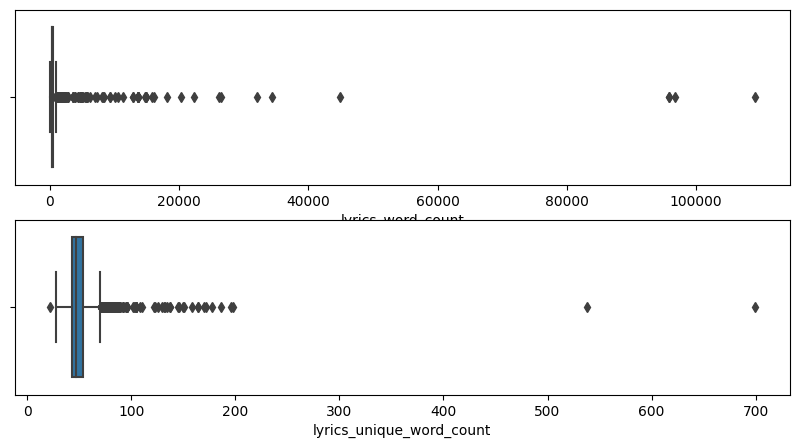

In [22]:
# Analysis on 

# a plot to see the likelihood between word count and unique word count

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes=plt.subplots(2,1, figsize=(10,5))


# df_eda['lyrics_word_count', 'lyrics_unique_word_count']
sns.boxplot(x=df_eda['lyrics_word_count'],ax=axes[0])

sns.boxplot(x=df_eda['lyrics_unique_word_count'],ax=axes[1])

In [23]:
# Filter out songs with over 1200 words
df_final=df_eda[df_eda['lyrics_word_count']<=1200]

In [24]:
# verify
df_final[df_final['lyrics_word_count']>1200]

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood,lyrics_word_count,lyrics_unique_word_count


In [25]:
# determine word count
df_final['lyrics_word_count']=df_final['lyrics'].apply(lambda x: len(x.split()))

# determine unique words
df_final['lyrics_unique_word_count']=df_final['lyrics'].apply(set).apply(len)

# testing
df_final

/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_64906/2973053406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['lyrics_word_count']=df_final['lyrics'].apply(lambda x: len(x.split()))
/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_64906/2973053406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['lyrics_unique_word_count']=df_final['lyrics'].apply(set).apply(len)


,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood,lyrics_word_count,lyrics_unique_word_count
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,Yeah\nI've been tryna call\nI've been on my ow...,0.514,0.730,...,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0,263,38
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,A club isn't the best place to find a lover\nS...,0.825,0.652,...,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1,711,49
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,"I'm going under, and this time, I fear there's...",0.501,0.405,...,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0,327,36
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,"Ayy, ayy, ayy, ayy Ooh\nOoh, ooh, ooh, ooh Ooh...",0.755,0.522,...,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1,309,44
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,"Ayy\nI'm tryna put you in the worst mood, ah\n...",0.679,0.587,...,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0,488,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,It's complicated... it always is\nThat's just ...,0.675,0.862,...,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0,0,240,44
2446,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,I'm really on the ropes this time\nI've been f...,0.502,0.168,...,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0,0,245,41
2447,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,Juice WRLD - Smile with The Weeknd\nJoji & Dip...,0.694,0.685,...,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0,0,563,77
2448,Saved,Khalid,American Teen,2017-04-27,206533,64,0,"2, 3, 4\nThe hard part always seems to last fo...",0.739,0.448,...,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0,1,381,43


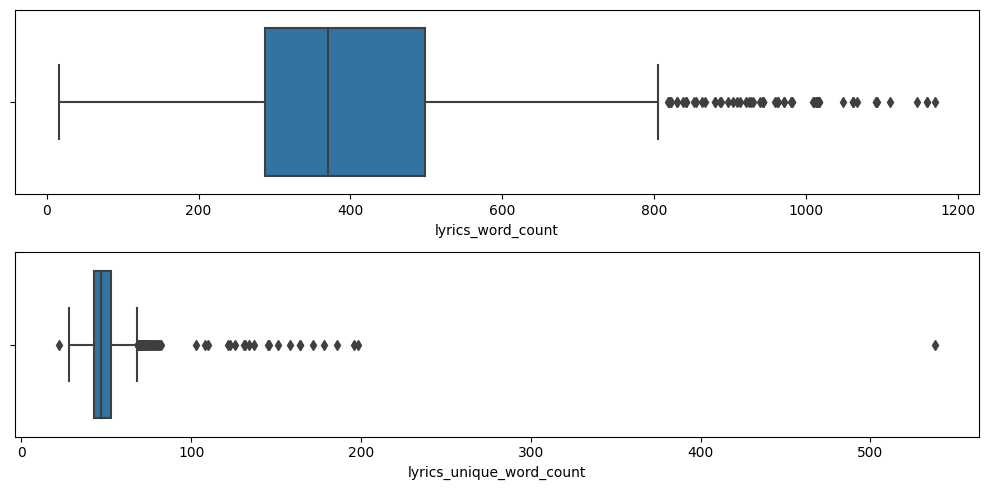

In [26]:
# Analysis on 

# a plot to see the likelihood between word count and unique word count

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes=plt.subplots(2,1, figsize=(10,5))


# df_eda['lyrics_word_count', 'lyrics_unique_word_count']
sns.boxplot(x=df_final['lyrics_word_count'],ax=axes[0])

sns.boxplot(x=df_final['lyrics_unique_word_count'],ax=axes[1])

plt.tight_layout()

In [27]:
# drop testing columns
df_final.drop(columns=['lyrics_word_count','lyrics_unique_word_count'], inplace=True)

/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_64906/2056696193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=['lyrics_word_count','lyrics_unique_word_count'], inplace=True)


In [28]:
# 2025 rows × 21 columns
df_final

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,Yeah\nI've been tryna call\nI've been on my ow...,0.514,0.730,...,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,A club isn't the best place to find a lover\nS...,0.825,0.652,...,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,"I'm going under, and this time, I fear there's...",0.501,0.405,...,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,"Ayy, ayy, ayy, ayy Ooh\nOoh, ooh, ooh, ooh Ooh...",0.755,0.522,...,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,"Ayy\nI'm tryna put you in the worst mood, ah\n...",0.679,0.587,...,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,It's complicated... it always is\nThat's just ...,0.675,0.862,...,-4.614,1.0,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0,0
2446,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,I'm really on the ropes this time\nI've been f...,0.502,0.168,...,-14.061,1.0,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0,0
2447,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,Juice WRLD - Smile with The Weeknd\nJoji & Dip...,0.694,0.685,...,-6.535,0.0,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0,0
2448,Saved,Khalid,American Teen,2017-04-27,206533,64,0,"2, 3, 4\nThe hard part always seems to last fo...",0.739,0.448,...,-10.280,0.0,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0,1


In [29]:
# Final data shape: 2130 rows × 21 columns 

# export the df_eda now

df_final.to_csv('text_processed_data.csv', index=False)

## Text Analysis after text preprocessing 

In [30]:
import pandas as pd

# with processed lyrics dataset
# df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data.csv")

# with unprocessed lyrics dataset
# df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data_without_lyrics.csv", encoding='utf-8')

# reading text-processed data
df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/text_processed_data.csv", encoding='utf-8')

In [31]:
# verify df
df

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,Yeah\nI've been tryna call\nI've been on my ow...,0.514,0.730,...,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,A club isn't the best place to find a lover\nS...,0.825,0.652,...,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,"I'm going under, and this time, I fear there's...",0.501,0.405,...,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,"Ayy, ayy, ayy, ayy Ooh\nOoh, ooh, ooh, ooh Ooh...",0.755,0.522,...,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,"Ayy\nI'm tryna put you in the worst mood, ah\n...",0.679,0.587,...,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,It's complicated... it always is\nThat's just ...,0.675,0.862,...,-4.614,1.0,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0,0
2021,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,I'm really on the ropes this time\nI've been f...,0.502,0.168,...,-14.061,1.0,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0,0
2022,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,Juice WRLD - Smile with The Weeknd\nJoji & Dip...,0.694,0.685,...,-6.535,0.0,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0,0
2023,Saved,Khalid,American Teen,2017-04-27,206533,64,0,"2, 3, 4\nThe hard part always seems to last fo...",0.739,0.448,...,-10.280,0.0,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0,1


In [32]:
# remove song with missing lyrics first

print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))
# 375 lyrics --> drop all null (not english songs)

# NOTE uncomment for the first 2 dataset
# df.dropna(subset=['lyrics'], inplace=True)

# print("Number of null values in the dataset:\n{0}".format(df.isnull().sum()))

Number of null values in the dataset:
track_name          0
artist              0
album               0
release_date        0
duration            0
popularity          0
explicit            0
lyrics              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
mood                0
dtype: int64


In [33]:
# NOTE uncomment if ran the first 2 dataset

# # make a new feature (mood) based on valence (which will be dropped later)
# df['mood']= df['valence'].apply(lambda x: 0 if x < 0.5 else 1)
# df

In [34]:
df['lyrics'][1].split("\n")

["A club isn't the best place to find a lover",
 'So the bar is where I go Mm',
 "Me and my friends at the table doin' shots",
 "Drinkin' fast and then we talk slow Mm",
 'And you come over and start up a conversation with just me',
 "And trust me, I'll give it a chance now Mm",
 'Take my hand, stop, put Van the Man on the jukebox',
 "And then we start to dance and now I'm singin' like",
 'Girl, you know I want your love',
 'Your love was handmade for somebody like me',
 'Well, come on now, follow my lead',
 "I may be crazy, don't mind me",
 "Say, Boy, let's not talk too much",
 'Grab on my waist and put that body on me',
 'Well, come on now, follow my lead',
 'Come, come on now, follow my lead, mm',
 "I'm in love with the shape of you",
 'We push and pull like a magnet do',
 "Although my heart is fallin' too",
 "I'm in love with your body",
 'And last night, you were in my room',
 'And now my bed sheets smell like you',
 "Every day, discoverin' somethin' brand new",
 "Well, I'm in lov

# NLP Data preprocessing

In [35]:
# create test df for safety

df_test=df.copy()

In [36]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
import re
from contractions import fix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources if not already installed
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_lyrics(lyrics):
    # Check if the lyrics are a string
    if isinstance(lyrics, str):
        if len(lyrics.split('\n', 1)) > 1:
            # Remove \n
            lyrics = lyrics.replace('\n', ' ')
            
            # Convert to lowercase
            lyrics = lyrics.lower()
            
            # Expand contractions
            lyrics = fix(lyrics)
            
            # Remove punctuation
            lyrics = re.sub(r'[^\w\s]', '', lyrics)

            # Remove Numbers
            lyrics = re.sub(r'\d+', '', lyrics)
            
            # Tokenize the lyrics
            words = nltk.word_tokenize(lyrics)
            
            # Remove stopwords and perform stemming
            cleaned_lyrics = ' '.join([stemmer.stem(word) for word in words if word not in stop_words])
            
            # Check if the cleaned lyrics are in English
            return cleaned_lyrics
        else:
            return ''  # Return empty string if split_lyrics has fewer than 2 elements
    else:
        return ''  # Return empty string if lyrics is not a string

# Apply the clean_lyrics function to the 'lyrics' column
df_test['lyrics'] = df_test['lyrics'].apply(clean_lyrics)

# Display the resulting DataFrame
print(df_test)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                         track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2020     When Love Takes Over (feat. Kelly Rowland)     David Guetta   
2021                                  Happiest Year     Jaymes Young   
2022                        Smile (with The Weeknd)       Juice WRLD   
2023                                          Saved           Khalid   
2024                                         A-Punk  Vampire Weekend   

                                        album release_date  duration  \
0                                 After Hours   2020-03-20    2

In [37]:
df_test['lyrics']

0       yeah tryna call long enough mayb show love may...
1       club best place find lover bar go mm friend ta...
2       go time fear one save noth realli got way driv...
3       ayi ayi ayi ayi ooh ooh ooh ooh ooh ooh ayi ay...
4       ayi tryna put worst mood ah p cleaner church s...
                              ...                        
2020    complic alway way goe feel like wait long wond...
2021    realli rope time fight life never said goodby ...
2022    juic wrld smile weeknd joji diplo daylight nle...
2023    hard part alway seem last forev sometim forget...
2024    johanna drove slowli citi hudson river fill sn...
Name: lyrics, Length: 2025, dtype: object

In [38]:
# OLD

# import numpy as np
# import pandas as pd
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.model_selection import train_test_split
# from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
# from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
# from tqdm import tqdm
# import re
# from langdetect import detect
# from contractions import fix
# from nltk.stem import WordNetLemmatizer


# # Download NLTK resources if not already installed
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# # Initialize WordNet Lemmatizer
# lemmatizer = WordNetLemmatizer()

# # # Define a function to check if the text is in English
# # def is_english(text):
# #     try:
# #         return detect(text) == 'en'
# #     except:
# #         return False  # Return False if language detection fails

# # Initialize BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# def clean_lyrics(lyrics):
#     # Check if the lyrics are a string
#     if isinstance(lyrics, str):
#         if len(lyrics.split('\n', 1)) > 1:

#             # insert work here



#             # Tokenization using BertTokenizer
#             tokens = tokenizer.tokenize(cleaned_lyrics)

#             # Join tokens back into a string
#             cleaned_lyrics = ' '.join(tokens)

#             # strip the spaces
#             cleaned_lyrics = cleaned_lyrics.strip()

#             # Check if the cleaned lyrics are in English
#             return cleaned_lyrics
#         else:
#             return ''  # Return None if split_lyrics has fewer than 2 elements
#     else:
#         return ''  # Return None if lyrics is not a string

# # Load and preprocess data
# # df = pd.read_csv("your_dataset.csv")
# df['lyrics'] = df['lyrics'].apply(clean_lyrics)

# More Exploratory Data Analysis

In [39]:

# Create separate copy of df purely for testing 

df_eda=df_test.copy()
# determine word count
df_eda['lyrics_word_count']=df['lyrics'].apply(lambda x: len(x.split()))

# determine unique words
df_eda['lyrics_unique_word_count']=df['lyrics'].apply(set).apply(len)

# testing
df_eda

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood,lyrics_word_count,lyrics_unique_word_count
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,yeah tryna call long enough mayb show love may...,0.514,0.730,...,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0,263,38
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,club best place find lover bar go mm friend ta...,0.825,0.652,...,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1,711,49
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,go time fear one save noth realli got way driv...,0.501,0.405,...,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0,327,36
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,ayi ayi ayi ayi ooh ooh ooh ooh ooh ooh ayi ay...,0.755,0.522,...,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1,309,44
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,ayi tryna put worst mood ah p cleaner church s...,0.679,0.587,...,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0,488,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,complic alway way goe feel like wait long wond...,0.675,0.862,...,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0,0,240,44
2021,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,realli rope time fight life never said goodby ...,0.502,0.168,...,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0,0,245,41
2022,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,juic wrld smile weeknd joji diplo daylight nle...,0.694,0.685,...,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0,0,563,77
2023,Saved,Khalid,American Teen,2017-04-27,206533,64,0,hard part alway seem last forev sometim forget...,0.739,0.448,...,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0,1,381,43


In [40]:
# numerical summary
df_eda[['lyrics_word_count', 'lyrics_unique_word_count']].describe()

,lyrics_word_count,lyrics_unique_word_count
count,2025.000000,2025.000000
mean,405.559506,49.876543
std,177.110073,17.433742
min,16.000000,22.000000
25%,287.000000,43.000000
50%,371.000000,47.000000
75%,498.000000,53.000000
max,1169.000000,538.000000


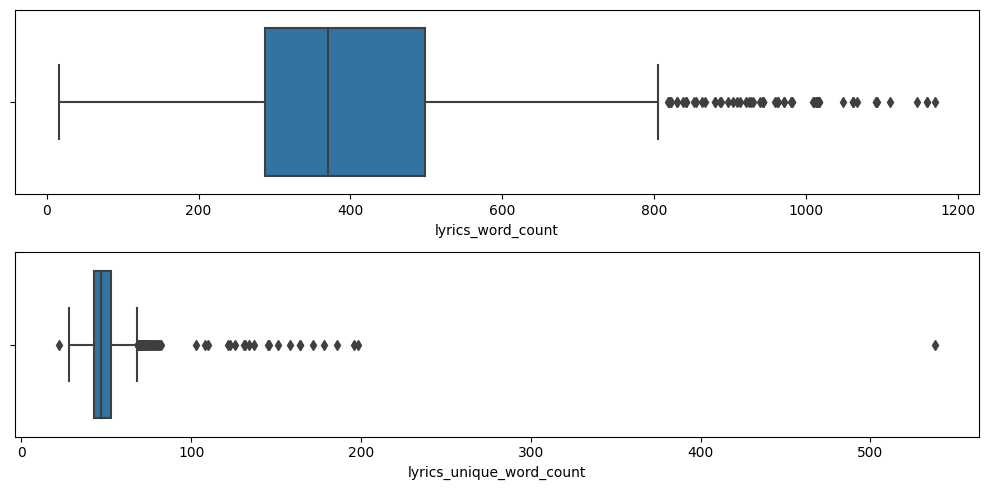

In [41]:
# Analysis on 

# a plot to see the likelihood between word count and unique word count

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes=plt.subplots(2,1, figsize=(10,5))


# df_eda['lyrics_word_count', 'lyrics_unique_word_count']
sns.boxplot(x=df_eda['lyrics_word_count'],ax=axes[0])

sns.boxplot(x=df_eda['lyrics_unique_word_count'],ax=axes[1])
plt.tight_layout()

In [42]:
from collections import Counter

# find the most/ least frequent words

# Combine all the texts in the column into a single string
entire_text = ' '.join(df_eda['lyrics'].astype(str))

# Tokenize the text into words (lowercased and removing punctuation)
words = re.findall(r'\b\w+\b', entire_text.lower())

# Count the frequency of each word
word_counts = Counter(words)

# Get the 10 most common words
most_common_words = word_counts.most_common(10)

# Find the number of words that occur only once
words_occur_once = sum(1 for count in word_counts.values() if count == 1)

print("Number of words that occur only once:", words_occur_once)


Number of words that occur only once: 8136


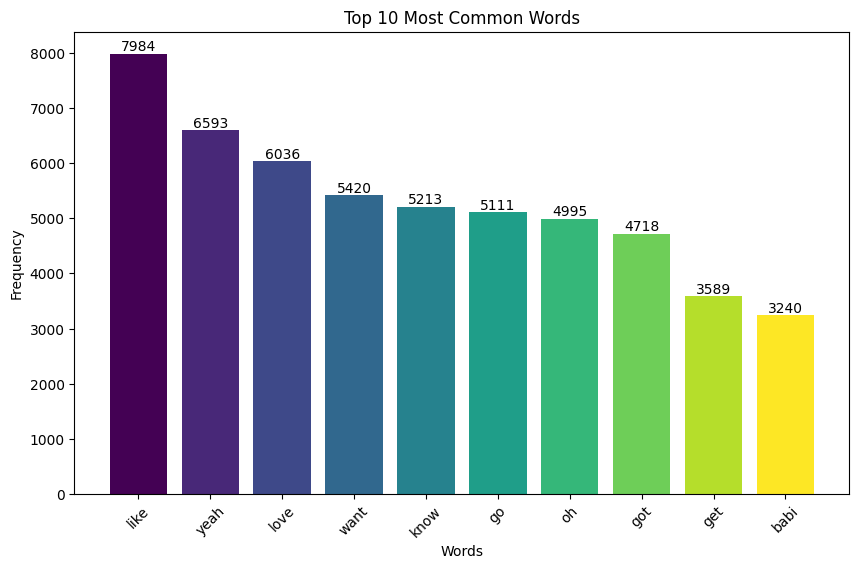

In [43]:
# frequency plot
import matplotlib as mpl

# Extract words and their frequencies
words = [word[0] for word in most_common_words]
frequencies = [word[1] for word in most_common_words]

cmap = mpl.colormaps['viridis'].resampled(10)

# Plot the bar plot
plt.figure(figsize=(10, 6))
bars=plt.bar(words, frequencies, color=cmap.colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)


# Annotate each bar with its frequency
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

plt.show()

In [44]:
# # wordcloud (NOTE: ONLY WORK IN Google Colab)

# from os import path
# from PIL import Image

# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# text = ' '.join(df_eda['lyrics'])

# # Create the WordCloud object
# wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)

# # Display the word cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [46]:
df_eda.drop(columns=['lyrics_word_count','lyrics_unique_word_count'], inplace=True)
df_eda

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mood
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,yeah tryna call long enough mayb show love may...,0.514,0.730,...,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,club best place find lover bar go mm friend ta...,0.825,0.652,...,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,1
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,go time fear one save noth realli got way driv...,0.501,0.405,...,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,ayi ayi ayi ayi ooh ooh ooh ooh ooh ooh ayi ay...,0.755,0.522,...,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,1
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,ayi tryna put worst mood ah p cleaner church s...,0.679,0.587,...,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,When Love Takes Over (feat. Kelly Rowland),David Guetta,One More Love,2010-11-22,191000,74,0,complic alway way goe feel like wait long wond...,0.675,0.862,...,-4.614,1.0,0.0253,0.01650,0.000427,0.1690,0.498,129.967,4.0,0
2021,Happiest Year,Jaymes Young,Feel Something (Deluxe),2022-01-28,228442,74,0,realli rope time fight life never said goodby ...,0.502,0.168,...,-14.061,1.0,0.0486,0.88500,0.000000,0.1110,0.355,112.881,3.0,0
2022,Smile (with The Weeknd),Juice WRLD,Legends Never Die,2020-07-10,196180,69,1,juic wrld smile weeknd joji diplo daylight nle...,0.694,0.685,...,-6.535,0.0,0.1330,0.22400,0.000000,0.1240,0.306,158.831,4.0,0
2023,Saved,Khalid,American Teen,2017-04-27,206533,64,0,hard part alway seem last forev sometim forget...,0.739,0.448,...,-10.280,0.0,0.1380,0.18900,0.000000,0.1180,0.553,81.044,4.0,1


In [47]:
# Final data shape: 2025 rows × 21 columns

# export the df_eda now

df_eda.to_csv('NLP_processed_text.csv', index=False)